# Data Project: Website Traffic Analysis

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. We have to answer the following questions:

1. How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
2. What about the other recorded events?
3. Which countries did the pageviews come from?
4. What was the overall click rate (clicks/pageviews)?
5. How does the clickrate distribute across different links?

**Importing Relevant Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the csv file as a pandas dataframe**

In [3]:
df=pd.read_csv(r'C:\Users\Gautam\Desktop\jnotebook\Projects\Stratascratch_Website_traffic_analysis\traffic.csv')
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


**Checking for Null values**

In [5]:
df.isna().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

Since, there are no null values in the event and linkid column, we can proceed.

**Removing duplicates**

In [6]:
df_deduplicated = df.drop_duplicates()

Since, we can have same event multiple times for a page by the same user, we have to create a copy of the dataframe with the duplicates dropped. 

# Data Exploration

**Frequency of each event**

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64


<AxesSubplot:title={'center':'events by count'}, xlabel='event', ylabel='Count'>

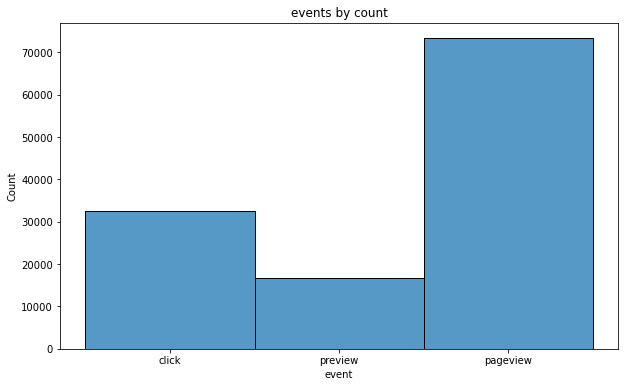

In [74]:
event_count= df_deduplicated['event'].value_counts()
print(event_count)
plt.figure(figsize=(10,6))
plt.title('events by count')
sns.histplot(df_deduplicated['event'])

As, we can observe, we have more than `70,000` pageviews and slightly more than `30,000` clicks and less than `20,000` previews.

In [8]:
df['date'].max(), df['date'].min()

('2021-08-25', '2021-08-19')

The dataset contains 7 days of data ranging from 19 Aug 2021 to 25 Aug 2021

**Number of events per day**

         date  count
0  2021-08-19  21156
1  2021-08-20  18536
2  2021-08-21  16701
3  2021-08-22  16927
4  2021-08-23  16415
5  2021-08-24  16291
6  2021-08-25  16541


<AxesSubplot:title={'center':'date by count'}, xlabel='date', ylabel='count'>

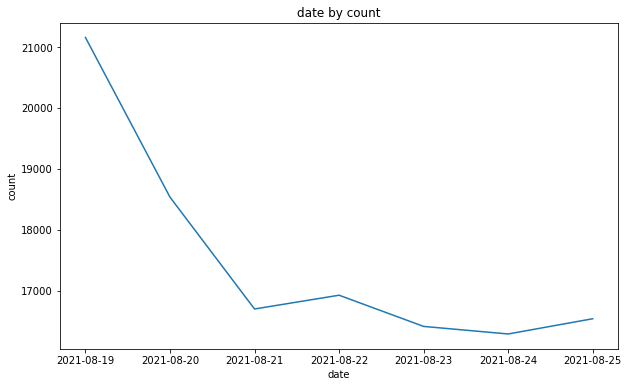

In [69]:
event_count= df_deduplicated.groupby('date').size().drop_duplicates().to_frame('count').reset_index()
print(event_count)
plt.figure(figsize=(10,6))
plt.title('date by count')
sns.lineplot(x='date',y='count',data=event_count)

As we can see, there is a sigificant drop in the events over the first 3 days from more than `21,000` to less than `17,000`, after which it stays in that range.

**Number of events by countries**

In [72]:
country_count=df['country'].value_counts()
country_count

Saudi Arabia     47334
India            42992
United States    32558
France           15661
Iraq              8260
                 ...  
Samoa                2
Macao                2
Afghanistan          2
Lesotho              1
Sint Maarten         1
Name: country, Length: 211, dtype: int64

Most traffic comes in Saudi Arabia followed by India and United states, while countries like Saint Maarten, Lesotho and Afghanistan have the lowest traffic.

In [73]:
country_count_deduplicated=df_deduplicated['country'].value_counts()
country_count_deduplicated

United States     28664
India             18689
France            10565
Saudi Arabia       7682
United Kingdom     5095
                  ...  
Samoa                 2
Macao                 2
Afghanistan           2
Lesotho               1
Sint Maarten          1
Name: country, Length: 211, dtype: int64

Since, we are dealing with duplicate values, we also have to see this data with the duplicated removed. Here, we can see that United Sates, India and France have the highest trafffic, while it is the countries with the lowest traffic are same as above. 

**Number of each event per day**

                     count
date       event          
2021-08-19 click      5860
           pageview  13006
           preview    2290
2021-08-20 click      4999
           pageview  11088
           preview    2449
2021-08-21 click      4279
           pageview   9939
           preview    2483
2021-08-22 preview    2524
           pageview   9982
           click      4421
2021-08-23 click      4314
           pageview   9722
           preview    2379
2021-08-24 click      4231
           pageview   9705
           preview    2355
2021-08-25 click      4395
           pageview   9918
           preview    2228


<AxesSubplot:title={'center':'Number of events per date'}, xlabel='date', ylabel='count'>

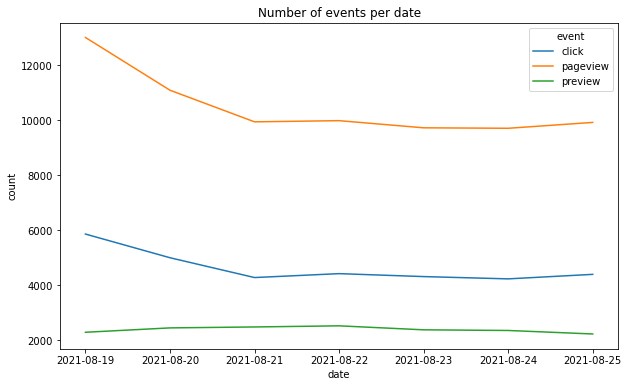

In [11]:
date_event_count=df_deduplicated.groupby(['date','event']).size().to_frame('count').sort_values(by='date',ascending=True)
print(date_event_count)
plt.figure(figsize=(10,6))
plt.title('Number of events per date')
sns.lineplot(x=date_event_count.index.get_level_values('date'),
             y=date_event_count['count'],
             data='date_event_count',
             hue=date_event_count.index.get_level_values('event'))

As we can see, there is a significant drop in the number of clicks in the first 3 days from more than `12,000` to about `10,000`, after which it stays consistent. Pageviews also show a drop from `6000` to `4000`. But, previews show no major change over the time period.

# Question 1

**How many total pageview events did the links in the provided dataset receive in the full period, how many per day?**

**Total pageview events**

In [12]:
pageview_total=df_deduplicated[df_deduplicated['event']=='pageview']['event'].value_counts()
print(pageview_total)

pageview    73360
Name: event, dtype: int64


**Pageview Events Per Day**

                     number of pageviews
event    date                           
pageview 2021-08-19                13006
         2021-08-20                11088
         2021-08-21                 9939
         2021-08-22                 9982
         2021-08-23                 9722
         2021-08-24                 9705
         2021-08-25                 9918


<AxesSubplot:title={'center':'Number of pageviews per date'}, xlabel='date', ylabel='number of pageviews'>

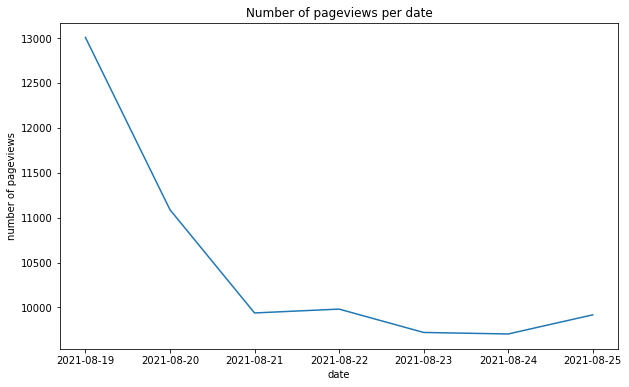

In [13]:
pageview_per_day=df_deduplicated[df_deduplicated['event']=='pageview'].groupby(['event','date']).size().to_frame('number of pageviews')
print(pageview_per_day)
plt.figure(figsize=(10,6))
plt.title('Number of pageviews per date')
sns.lineplot(x=pageview_per_day.index.get_level_values('date'),
             y=pageview_per_day['number of pageviews'],
             data='pageview_per_day')

We see a significant drop in the number of pageviews from `13,000` to less than `10,000` in the first 3 days then it drops further over the by the 5th day, and finally showing a slight increase by the 7th day.

# Question 2

**What about the other recorded events?**

**Total number of each event**

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64


<AxesSubplot:title={'center':'Events by count'}, xlabel='event', ylabel='Count'>

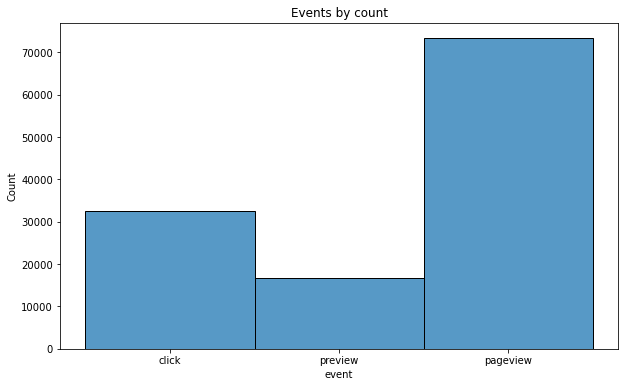

In [14]:
event_count= df_deduplicated['event'].value_counts()
print(event_count)
plt.figure(figsize=(10,6))
plt.title('Events by count')
sns.histplot(df_deduplicated['event'])

As we also observed previously, we have more than `70,000` pageviews, which is about twice more than the number of clicks and about four time more than the number of previews.

**Total number of each event per day**

                     count
date       event          
2021-08-19 click      5860
           pageview  13006
           preview    2290
2021-08-20 click      4999
           pageview  11088
           preview    2449
2021-08-21 click      4279
           pageview   9939
           preview    2483
2021-08-22 preview    2524
           pageview   9982
           click      4421
2021-08-23 click      4314
           pageview   9722
           preview    2379
2021-08-24 click      4231
           pageview   9705
           preview    2355
2021-08-25 click      4395
           pageview   9918
           preview    2228


<AxesSubplot:title={'center':'Number of events per date'}, xlabel='date', ylabel='count'>

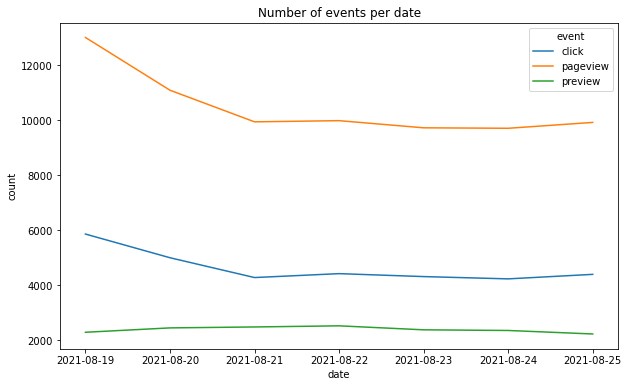

In [15]:
date_event_count=df_deduplicated.groupby(['date','event']).size().to_frame('count').sort_values(by='date',ascending=True)
print(date_event_count)
plt.figure(figsize=(10,6))
plt.title('Number of events per date')
sns.lineplot(x=date_event_count.index.get_level_values('date'),
             y=date_event_count['count'],
             data='date_event_count',
             hue=date_event_count.index.get_level_values('event'))

As we have also seen previously, there is a significant drop in the number of clicks in the first 3 days from more than `12,000` to about `10,000`, after which it stays consistent. Pageviews also show a drop from `6000` to `4000`. But, previews show no major change over the time period and stay around `2000`.

# Question 3 

**Which countries did the pageviews come from?**

                      country  count
0               United States  18131
1                       India  10565
2                      France   6181
3                Saudi Arabia   3712
4              United Kingdom   3218
..                        ...    ...
206    Principality of Monaco      1
207              Saint Martin      1
208         Wallis and Futuna      1
209  Central African Republic      1
210           Solomon Islands      1

[211 rows x 2 columns]


<AxesSubplot:title={'center':'Top 10 countries with highest number of pageviews'}, xlabel='country', ylabel='count'>

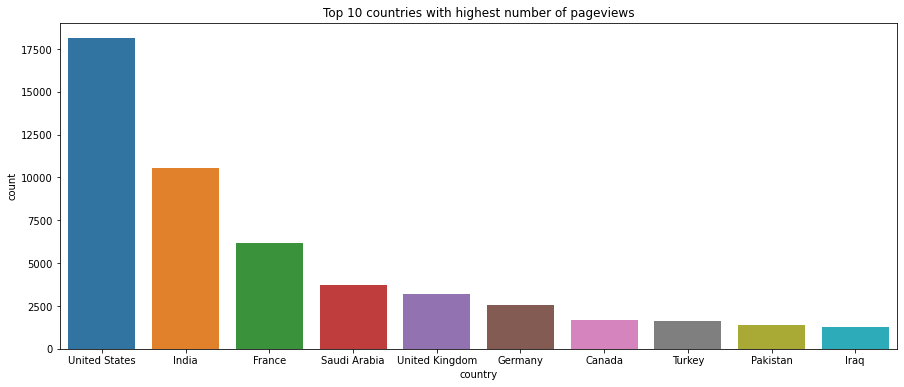

In [76]:
country_pageview=df_deduplicated[df_deduplicated['event']=='pageview'].groupby('country').size().sort_values(ascending=False).to_frame('count').reset_index()
print(country_pageview)

plt.figure(figsize=(15,6))
plt.title('Top 10 countries with highest number of pageviews')
sns.barplot(x='country',y='count',data=country_pageview.head(10) )

Highest number of pageviews come from the United States with over `17,500` pagevies,followed by India with `10,000` pageviews and France with more than `5000` pageviews, Solomon Islands, Central African Republic, and Wallis and Futuna have the lowest number of pageviews with only `1` pageview each.

# Question 4

**What was the overall click rate (clicks/pageviews)?**

In [17]:
click_per_pageview=len(df_deduplicated[df_deduplicated['event']=='pageview'])/len(df[df['event']=='click'])
click_per_pageview

1.3162994330007896

Overall click rate for all the links.

**Creating seperate dataframes for clicks and pageviews**

We want to see the click rate for each link, therefore, we fave to create two dataframes containing the clicks and pageviews seperately.

In [18]:
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={"event": "clicks"})

pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={"event": "pageviews" })

In [19]:
link_merged= pd.merge(link_clicks,pageviews,on='linkid',how='inner')
link_merged

,linkid,clicks,pageviews
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4
...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2


In [20]:
link_merged['click_rate']=link_merged['clicks']/link_merged['pageviews']
link_merged

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


# Question 5 

**How does the clickrate distribute across different links?**

In [22]:
link_merged['click_rate'].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

Using the `.describe()`, we can see the the count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.

<AxesSubplot:title={'center':'Events by count'}, xlabel='click_rate', ylabel='Count'>

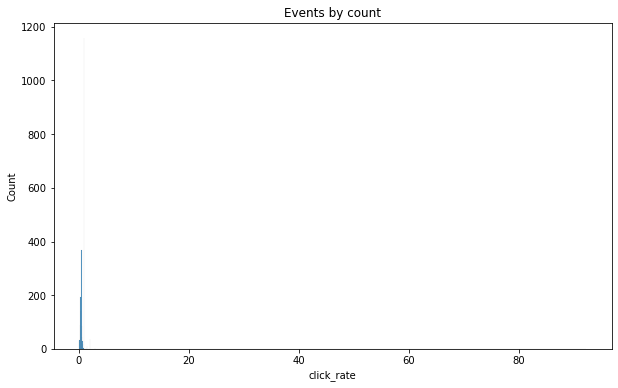

In [23]:
plt.figure(figsize=(10,6))
plt.title('Events by count')
sns.histplot(link_merged['click_rate'])

Since the data is highly skewed to the left, we have to use a log scale to get a clearer distribution. We can use the `np.log10()` to convert the given data to log scale.

<AxesSubplot:title={'center':'Events by count'}, xlabel='log_click_rate', ylabel='Count'>

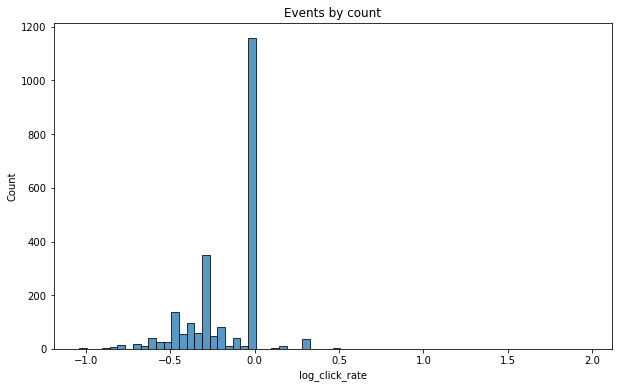

In [32]:
link_merged['log_click_rate']= np.log10(link_merged['click_rate'])
plt.figure(figsize=(10,6))
plt.title('Events by count')
sns.histplot(link_merged['log_click_rate'])

We can see that a big spike at `0`, this means that the actual click rate was `1`. This implies that there many links which were viewed and clicked on exactly once. we also see spikes on values less than zero, implying that many links were viewd many times but clicked fewer times.

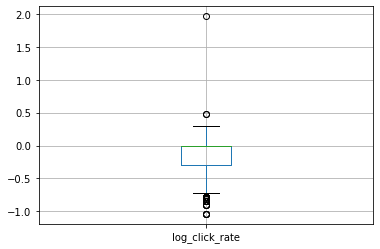

In [33]:
ax = link_merged.boxplot(column='log_click_rate')

Here we can see the visualization of the `.describe()` method showing the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.

We can observe 2 outliers, implying that these two links were cliked multiple times in the same pageview. Also, we observe many outliers Q1, implying that they have very low click rate.